In [19]:
from astropy import constants as const
from astropy import units as units
from IPython.display import Markdown as md
import sympy
from sympy import integrate, diff, sqrt, cos, sin, pi, exp, log
from sympy.abc import * 
i = sqrt(-1)
import numpy as np
import sympy.printing as printing
latp = printing.latex
hbar = sympy.symbols("hbar", real=True)
hbar

hbar

Where $B$ is the spectral radiance and $f$ is the frequency, we have Planck's law of Blackbody Radiation. We will be using CGS units.

In [101]:
def B(T, l, use_cgs = False):
    if use_cgs:
        k_B = const.k_B.value
        h = const.h.value
        c = const.c.value
    else:
        k_B, h, c = sympy.symbols("k_B h c")
    return 2*h* ( ( c / l )**3 ) / (c**2 * (exp(h * c / (l * k_B * T)) - 1))
md("In CGS units, we have " + "\\begin{equation} B_l = " + latp(B(T,l))
   + "\\end{equation}")

In CGS units, we have \begin{equation} B_l = \frac{2 c h}{l^{3} \left(e^{\frac{c h}{T k_{B} l}} - 1\right)}\end{equation}

In [102]:
from sympy.plotting import plot
def plot_planck(T): 
    return plot(B(T, l, True) * 10**9, xlim = (350 * 10**-9, 1600 * 10**-9),
        yscale="log", title = "Planck Function for Blackbody at " + str(T) + " Kelvin",
        xlabel = "Wavelength (nm)", ylabel = "Spectral Radiance (W/($m^2$ nm))")

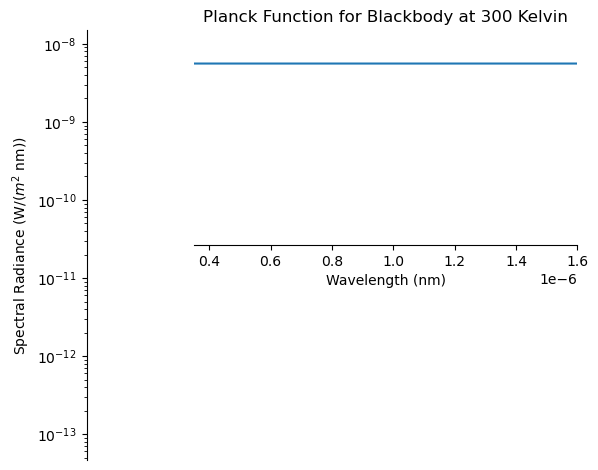

In [103]:
plot_planck(300)

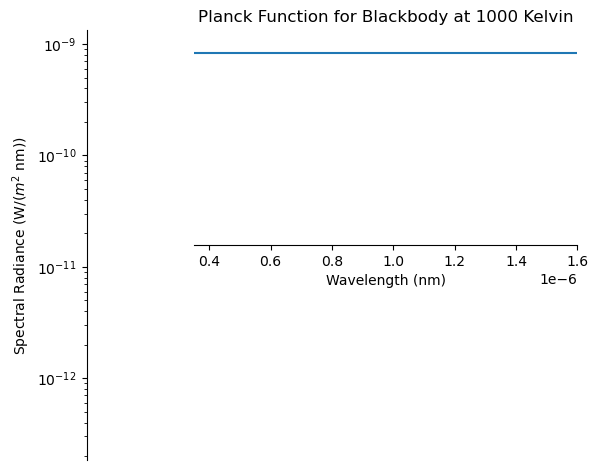

In [104]:
plot_planck(1000)

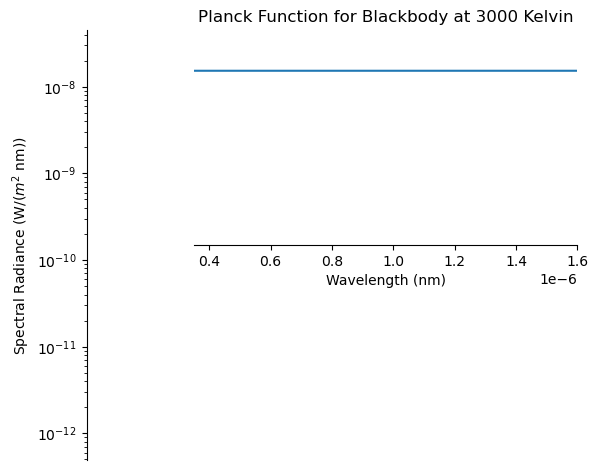

In [105]:
plot_planck(3000)

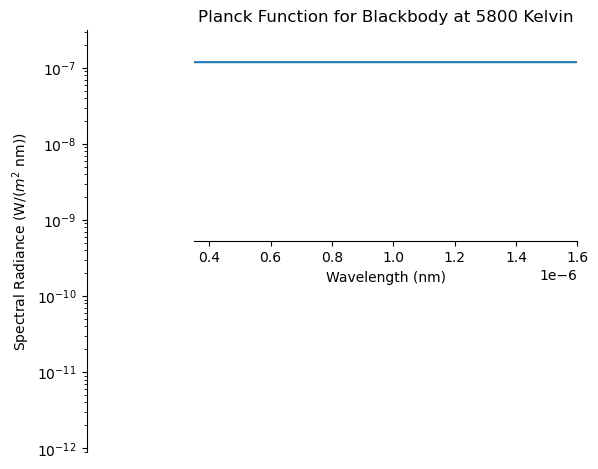

In [106]:
plot_planck(5800)

In [107]:
B(300, 1600 * 10**-9, True)

9.31062623605445e-21

In [108]:
(2.99 * units.mm / 300).to(units.nm)

<Quantity 9966.66666667 nm>

In [110]:
B(T, l, True) * 10**9

35.7065700278579/(l**3*(8.98755178736818e+16*exp(0.0143877687750393/(T*l)) - 8.98755178736818e+16))